In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
dataframe = pd.read_csv(r"D:\doctorado\materias\2-ML\trabajo_practico\desarrollo\amazon\cuenta_palabras.csv",sep=',')
dataframe.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,words
0,213395,B0029A8Y3Y,AXVX0TMQBDPCH,LelaJose,0,0,5,1323475200,Olave Olive Oil,This is a very fine olive oil with a pleasent ...,46
1,213396,B001GZYCDY,A1GHQQH6TILS2G,"kathie ann stevenson ""harmoniousseller""",0,0,5,1242691200,some of the dreamiest chocolate ever,don't not buy this because its a bit pricy! Th...,27
2,213397,B000I028DY,AD6WAQWOG5S42,Nightshade,1,1,5,1269993600,DE LI CIOUS!!!,"MMMMM, MMMMM, GOOD! These have been an old fa...",32
3,213398,B001AYDBH4,A1GUUDOA3KFXW7,D. Murphy,1,1,3,1256860800,"Good tasting, but flavor wasn't what was marked","The package is marked as wonton flavored, but ...",42
4,213399,B001AYDBH4,A1G74MVYE0QTP6,U. Pradipasena,0,0,5,1315958400,Close to Hong Kong.,This is the closest to Hong Kong Wonton Min in...,99
5,213400,B000LRIL3U,AFLPWZ266H0A4,"James J. Pyke ""Pajkossy""",6,6,5,1179273600,It's the truth!,"""The World's Best"" is usually just an empty ma...",163
6,213401,B000LRIL3U,A3D2WN6VXTR4G1,Stephanie,3,3,5,1297555200,Absolutely the best!,"This is a fabulous rub! I'm a trained chef, a...",54
7,213402,B000LRIL3U,A1CA2EVLPX0EAH,rashomon,2,2,5,1262649600,a little advance prep goes a long way,This rub is absolutely fantastic. Follow the d...,103
8,213403,B000LRIL3U,A3HG9XCAISDDF7,"Michael Bellomo ""mbellomo""",1,1,5,1228521600,Savory sure-fire chicken spice mix!,I'm an avid cook and enjoy trying commercial a...,271
9,213404,B000LRIL3U,A2TH4DYMF8FF5D,kai's mom,1,1,5,1184371200,Amazing rotisserie chciken!!!,"I first purchased this at Big Lots, skeptical ...",83


In [3]:
dataframe.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,words
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05,568454.000000
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09,82.407073
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07,81.062017
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08,3.000000
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09,35.000000
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09,58.000000
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09,101.000000
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09,3535.000000


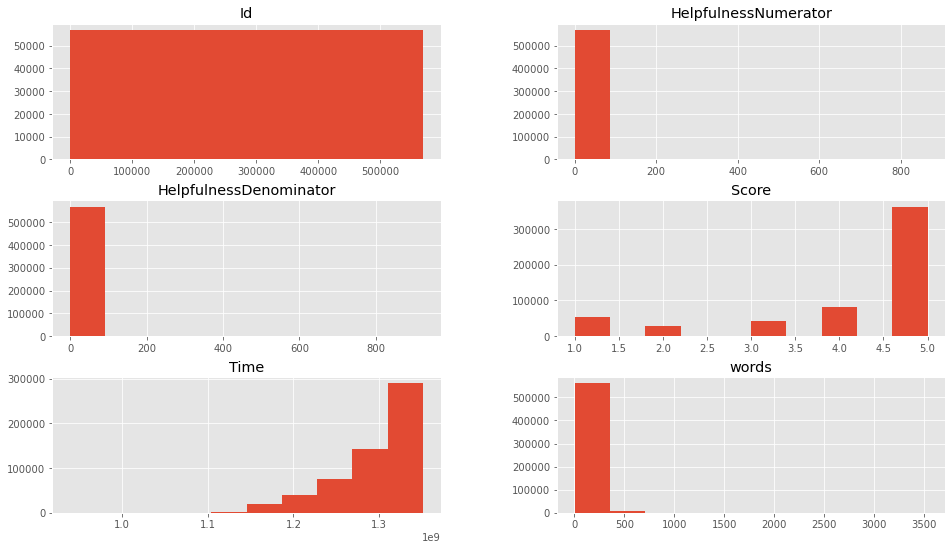

In [4]:
dataframe.hist()
plt.show()

In [8]:
print(dataframe.groupby('Score').size())

Score
1     52268
2     29769
3     42640
4     80655
5    363122
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


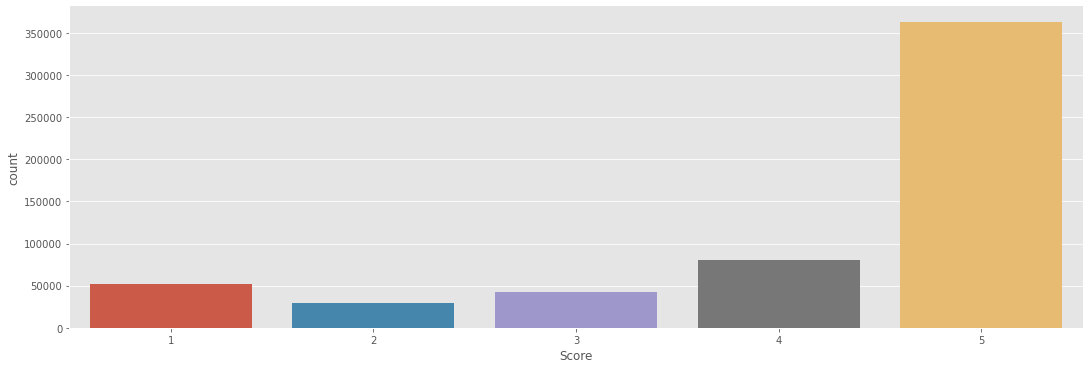

In [7]:
sb.catplot('Score',data=dataframe,kind="count", aspect=3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


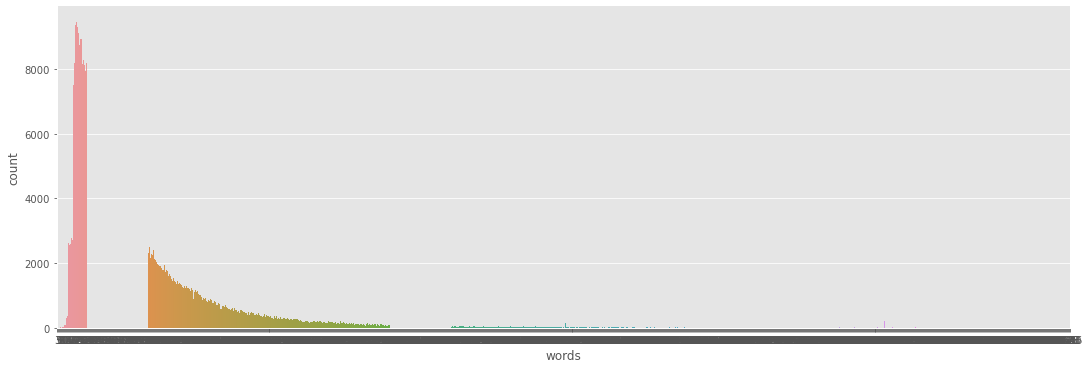

In [9]:
sb.catplot('words',data=dataframe,kind="count", aspect=3)

In [6]:
X = dataframe[['words']].values
y = dataframe['Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
n_neighbors = 50

knn = KNeighborsClassifier(n_neighbors, n_jobs= -1)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.64
Accuracy of K-NN classifier on test set: 0.64


([<matplotlib.axis.XTick at 0x2b13ebf2190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

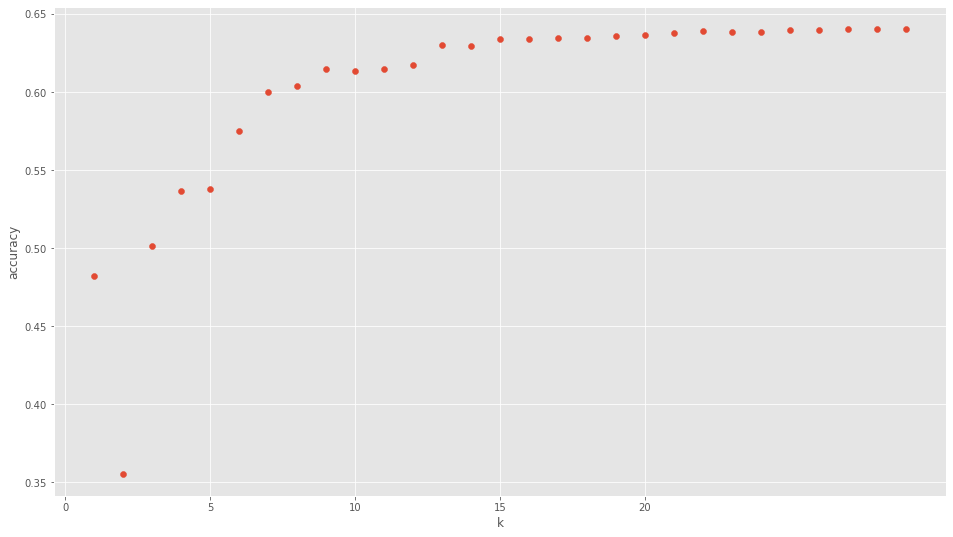

In [16]:
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [17]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[   65     0     5    31 12831]
 [    3     0     3    21  7431]
 [    4     0    19    48 10506]
 [   12     0    15   115 19964]
 [   25     0    20   183 90813]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.60      0.01      0.01     12932
           2       0.00      0.00      0.00      7458
           3       0.31      0.00      0.00     10577
           4       0.29      0.01      0.01     20106
           5       0.64      1.00      0.78     91041

    accuracy                           0.64    142114
   macro avg       0.37      0.20      0.16    142114
weighted avg       0.53      0.64      0.50    142114



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [22]:
print(clf.predict([[1]]))

[5]


In [25]:
print(clf.predict_proba([[1]]))

[[0.07166624 0.22216534 0.03583312 0.13002304 0.54031226]]
